### CDS NYU
### DS-GA 1007 | Programming for Data Science
### Lab 09
### Date 


# Pandas: Advanced Data Objects (Part 2)

### ▶ Operating on Data Frames

### ▶ Handling Missing Values

## Section Leaders


Cora Mao  --  ym1596@nyu.edu  -- 

Devarsh Patel --  dp3324@nyu.edu  --


## Resources

* Concise textbook introduction to Pandas: ”Python Data Science Handbook” pp. 33-96, by Jake VanderPlas
    * Also accessible online at https://jakevdp.github.io/PythonDataScienceHandbook

* Pandas's freely acccessible, online, high-quality and concise documentation: https://pandas.pydata.org


## 1. Use case 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read Data
Titanic: https://github.com/pandas-dev/pandas/blob/master/doc/data/titanic.csv

In [ ]:
titanic = pd.read_csv('Titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Compute Summary Statistics

In [ ]:
# What is the mean age of the Titanic passengers?
titanic["Age"].mean()

29.69911764705882

In [ ]:
# What is the median age and ticket fare price of the Titanic passengers?
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [ ]:
# What is the min, median age and the max, mean ticket fare price of the Titanic passengers?
titanic.agg({'Age': ['min',  'median'],
            'Fare': ['max', 'mean']})

,Age,Fare
min,0.42,NaN
median,28.00,NaN
max,NaN,512.329200
mean,NaN,32.204208


In [ ]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Subset the dataframe (boolean indexing)

In [ ]:
titanic[titanic["Age"] > 30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


Extract the dataframe where the passengers are in Class 1 and 2 


In [ ]:
class_12 = titanic[(titanic["Pclass"] == 1) | (titanic["Pclass"] == 2)]
class_12.shape

(400, 12)

Extract the dataframe where the passengers are in Class 3 and age > 40

In [ ]:
titanic[(titanic["Pclass"] == 3) & (titanic["Age"] > 40)].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.250,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.750,NaN,Q
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,NaN,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.500,NaN,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.050,NaN,S


In [ ]:
# Select the names of passengers in Class 3 and age > 40
names = titanic.loc[(titanic["Pclass"] == 3) & (titanic["Age"] > 40), "Name"]

In [ ]:
names

94                                   Coxon, Mr. Daniel
116                               Connors, Mr. Patrick
129                                 Ekstrom, Mr. Johan
132     Robins, Mrs. Alexander A (Grace Charity Laury)
152                                   Meo, Mr. Alfonzo
153                    van Billiard, Mr. Austin Blyler
160                           Cribb, Mr. John Hatfield
167    Skoog, Mrs. William (Anna Bernhardina Karlsson)
197                   Olsen, Mr. Karl Siegwart Andreas
203                               Youseff, Mr. Gerious
222                            Green, Mr. George Henry
254           Rosblom, Mrs. Viktor (Helena Wilhelmina)
276                  Lindblom, Miss. Augusta Charlotta
280                                   Duane, Mr. Frank
326                          Nysveen, Mr. Johan Hansen
338                              Dahl, Mr. Karl Edwart
349                                   Dimic, Mr. Jovan
362                    Barbara, Mrs. (Catherine David)
406       

## Handle Missing values

In [ ]:
# First we should know how many
titanic['Age'].isnull().sum()

177

### Fill in missing values

In [ ]:
#fill the null with the mean value
titanic['Age'].fillna(np.mean(titanic['Age']), inplace = True)

In [ ]:
#now check the number of null again
titanic['Age'].isnull().sum()

0

In [ ]:
titanic['Cabin'].isnull().sum()

687

In [ ]:
#fill the null with specific value
titanic['Cabin'].fillna('Unknown', inplace = True)

### Plot

(array([  9.,   1.,   3.,   1.,   4.,   6.,   5.,   0.,   3.,   2.,  18.,
         17.,  16.,  32.,  16.,  26.,  18.,  19.,  20., 152.,  11.,  19.,
         10.,  18.,   6.,   6.,  16.,   6.,  11.,   6.,  12.,   8.,   5.,
          5.,   8.,   0.,   6.,   3.,   2.,   4.,   2.,   5.,   0.,   5.,
          1.,   0.,   0.,   5.,   0.,   1.]),
 array([ 1.  ,  2.46,  3.92,  5.38,  6.84,  8.3 ,  9.76, 11.22, 12.68,
        14.14, 15.6 , 17.06, 18.52, 19.98, 21.44, 22.9 , 24.36, 25.82,
        27.28, 28.74, 30.2 , 31.66, 33.12, 34.58, 36.04, 37.5 , 38.96,
        40.42, 41.88, 43.34, 44.8 , 46.26, 47.72, 49.18, 50.64, 52.1 ,
        53.56, 55.02, 56.48, 57.94, 59.4 , 60.86, 62.32, 63.78, 65.24,
        66.7 , 68.16, 69.62, 71.08, 72.54, 74.  ]),
 <BarContainer object of 50 artists>)

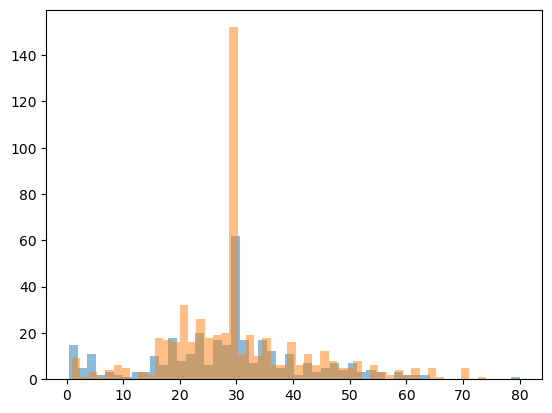

In [ ]:
plt.hist(titanic.loc[titanic['Survived'] == 1, 'Age'], bins=50, alpha = 0.5)
plt.hist(titanic.loc[titanic['Survived'] == 0, 'Age'], bins=50, alpha = 0.5)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

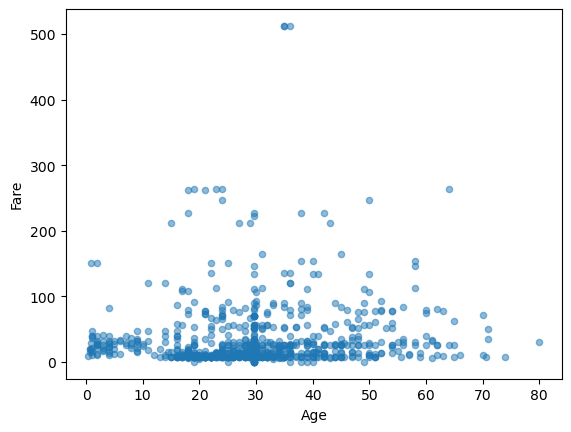

In [ ]:
titanic.plot.scatter(x="Age", y="Fare", alpha=0.5)

## Write data
We can write the dataframe out for later use.

In [ ]:
titanic.to_csv('Titanic_v1.csv')

# Exercise
Data is adapted from a dataset from kaggle:  
https://www.kaggle.com/spscientist/students-performance-in-exams

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.head()

,gender,group,test preparation course,math score,reading score,writing score
0,female,group B,none,72.0,72,74.0
1,female,group C,completed,69.0,90,88.0
2,female,group B,none,NaN,95,NaN
3,male,group A,none,47.0,57,44.0
4,male,group C,none,76.0,78,75.0


In [ ]:
df.shape

(1000, 6)

In [ ]:
df.isnull().sum()

gender                       0
group                        0
test preparation course      0
math score                 142
reading score                0
writing score               96
dtype: int64

1. How many people complete the test preparation course? 
2. What is the number of students in each group?
3. How many students take math but miss writing test?
4. Will the students taking test preparation course tend to have a higher reading score than those not? (Compare the average score)
5. Plot the histogram of students' writing score in group B.

## Use case 2

## Reference
https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

https://github.com/LearnDataSci/articles/tree/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners




Create Data - We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.

Get Data - We will learn how to read in the text file. The data consist of baby names and the number of babies born in the year 1880.

Prepare Data - Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.

Analyze Data - We will simply find the most popular name in a specific year. Present Data - Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.

The pandas library is used for all the data analysis excluding a small piece of the data presentation section. The matplotlib library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.

In [ ]:

# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [ ]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Pandas version 1.4.4
Matplotlib version 3.5.2


## Create Data
The data set will consist of 5 baby names and the number of births recorded for that year (1880).



In [ ]:
# The initial set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [ ]:
#check the manual
zip?

In [ ]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

We are basically done creating the data set. We now will use the pandas library to export this data set into a csv file.

df will be a DataFrame object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside df.

In [ ]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df


,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


## Prepare Data
The data we have consists of baby names and the number of births in the year 1880. We already know that we have 5 records and none of the records are missing (non-null values).

The Names column at this point is of no concern since it most likely is just composed of alpha numeric strings (baby names). There is a chance of bad data in this column but we will not worry about that at this point of the analysis. The Births column should just contain integers representing the number of babies born in a specific year with a specific name. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.

Realize that aside from the check we did on the "Names" column, briefly looking at the data inside the dataframe should be as far as we need to go at this stage of the game. As we continue in the data analysis life cycle we will have plenty of opportunities to find any issues with the data set.

In [ ]:
df.dtypes

Names     object
Births     int64
dtype: object

In [ ]:
# Check data type of Births column
df.Births.dtype

dtype('int64')

## Analyze Data
To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

Sort the dataframe and select the top row
Use the max() attribute to find the maximum value


In [ ]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [ ]:
# Method 2:
df['Births'].max()

973

## Present Data
Here we can plot the Births column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that Mel is the most popular baby name in the data set.

plot() is a convinient attribute where pandas lets you painlessly plot the data in your dataframe. We learned how to find the maximum value of the Births column in the previous section. Now to find the actual baby name of the 973 value looks a bit tricky, so lets go over it.

Explain the pieces:
df['Names'] - This is the entire list of baby names, the entire Names column
df['Births'] - This is the entire list of Births in the year 1880, the entire Births column
df['Births'].max() - This is the maximum value found in the Births column

[df['Births'] == df['Births'].max()] IS EQUAL TO [Find all of the records in the Births column where it is equal to 973]
df['Names'][df['Births'] == df['Births'].max()] IS EQUAL TO Select all of the records in the Names column WHERE [The Births column is equal to 973]

An alternative way could have been to use the Sorted dataframe:
Sorted['Names'].head(1).value

The str() function simply converts an object into a string.

The most popular name


,Names,Births
4,Mel,973


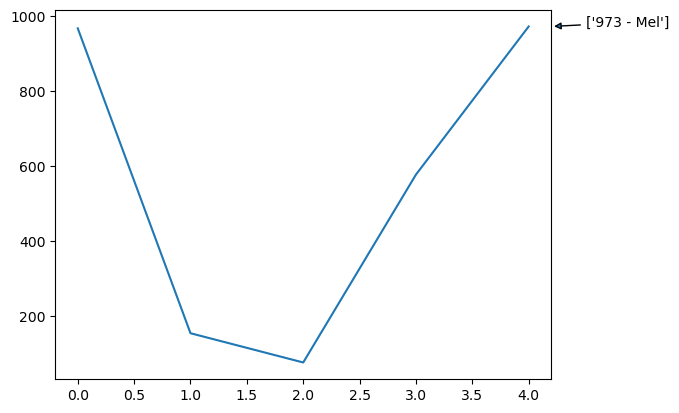

In [ ]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), 
                   xytext=(25, 0), 
                   xycoords=('axes fraction', 'data'), 
                   textcoords='offset points',
                   arrowprops=dict(arrowstyle='-|>'))

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

## adding columns
## deleting columns
## slicing the data 

In [ ]:
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
# Lets change the name of the column
df.columns = ['Rev']
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
#Lets add a column
df['NewCol'] = 5
df

,Rev,NewCol
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
5,5,5
6,6,5
7,7,5
8,8,5
9,9,5


In [ ]:
# Lets modify our new column
df['NewCol'] = df['NewCol'] + 1
df

,Rev,NewCol
0,0,6
1,1,6
2,2,6
3,3,6
4,4,6
5,5,6
6,6,6
7,7,6
8,8,6
9,9,6


In [ ]:
# We can delete columns
del df['NewCol']
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
# Lets add a couple of columns
df['test'] = 3
df['col'] = df['Rev']
df

,Rev,test,col
0,0,3,0
1,1,3,1
2,2,3,2
3,3,3,3
4,4,3,4
5,5,3,5
6,6,3,6
7,7,3,7
8,8,3,8
9,9,3,9


In [ ]:
# If we wanted, we could change the name of the index
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
df

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2
d,3,3,3
e,4,3,4
f,5,3,5
g,6,3,6
h,7,3,7
i,8,3,8
j,9,3,9


We can now start to select pieces of the dataframe using loc.

In [ ]:
df.loc['a']

Rev     0
test    3
col     0
Name: a, dtype: int64

In [ ]:
# df.loc[inclusive:inclusive]
df.loc['a':'d']

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2
d,3,3,3


In [ ]:
# df.iloc[inclusive:exclusive]
# Note: .iloc is strictly integer position based. It is available from [version 0.11.0] (http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#v0-11-0-april-22-2013) 
df.iloc[0:3]

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2


We can also select using the column name.

In [ ]:
df['Rev']

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
Name: Rev, dtype: int64

In [ ]:
#select a list of column names
df[['Rev', 'test']]

,Rev,test
a,0,3
b,1,3
c,2,3
d,3,3
e,4,3
f,5,3
g,6,3
h,7,3
i,8,3
j,9,3


There is also some handy function to select the top and bottom records of a dataframe.

In [ ]:
# Select top N number of records (default = 5)
df.head(3)

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2


In [ ]:
# Select bottom N number of records (default = 5)
df.tail()

,Rev,test,col
f,5,3,5
g,6,3,6
h,7,3,7
i,8,3,8
j,9,3,9


Lets take a look at the groupby function.

In [ ]:
# Our small data set
d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']}

# Create dataframe
df = pd.DataFrame(d)
df

,one,two,letter
0,1,2,a
1,1,2,a
2,1,2,b
3,1,2,b
4,1,2,c


In [ ]:
# Create group object (lecture 9)
one = df.groupby('letter')

# Apply sum function
one.sum()

,one,two
letter,,
a,2,4
b,2,4
c,1,2


In [ ]:
letterone = df.groupby(['letter','one']).sum()
letterone

,,two
letter,one,
a,1,4
b,1,4
c,1,2


In [ ]:
letterone.index

MultiIndex([('a', 1),
            ('b', 1),
            ('c', 1)],
           names=['letter', 'one'])

In [ ]:
letterone = df.groupby(['letter','one'], as_index=False).sum()
letterone

,letter,one,two
0,a,1,4
1,b,1,4
2,c,1,2


In [ ]:
letterone.index

Int64Index([0, 1, 2], dtype='int64')

## more complex example

In [ ]:
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

## Getting info about your data
.info() should be one of the very first commands you run after loading your data:

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [ ]:
#Another fast and useful attribute is .shape, which outputs just a tuple of (rows, columns):

movies_df.shape

(1000, 11)

### Handling duplicates
This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows.

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself:

In [ ]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(2000, 11)

In [ ]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

In [ ]:
temp_df.drop_duplicates(inplace=True)

Since we didn't define the keep arugment in the previous example it was defaulted to first. This means that if two rows are the same pandas will drop the second row and keep the first row. Using last has the opposite effect: the first row is dropped.

keep, on the other hand, will drop all duplicates. If two rows are the same then both will be dropped. Watch what happens to temp_df:

In [ ]:
temp_df = movies_df.append(movies_df)  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 11)

In [ ]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [ ]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In [ ]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

## work with missing values

let's calculate to total number of nulls in each column of our dataset. The first step is to check which cells in our DataFrame are null:

In [ ]:
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

In [ ]:
movies_df.dropna()
#This operation will delete any row with at least a single null value, but it will return a new DataFrame without altering the original one. You could specify inplace=True in this method as well.

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


In [ ]:
#Other than just dropping rows, you can also drop columns with null values by setting axis=1:

movies_df.dropna(axis=1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


In [ ]:
revenue = movies_df['revenue_millions']

In [ ]:
revenue_mean = revenue.mean()

revenue_mean

82.95637614678897

In [ ]:
revenue.fillna(revenue_mean, inplace=True)

In [ ]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64